In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)

y = 2 * y - 1

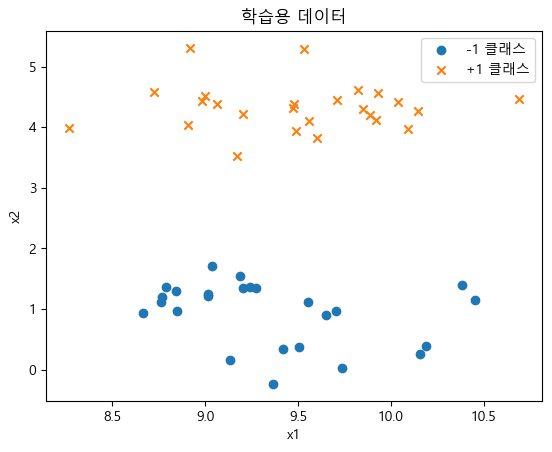

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")

plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()

plt.title("학습용 데이터")

plt.show()

In [4]:
from sklearn.svm import SVC
# 슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
# 커널(kernel) : 판별 경계를 찾기 위한 내적 함수

model = SVC(kernel='linear', C=1e10).fit(X, y)
model

SVC(C=10000000000.0, kernel='linear')

# 예측 결과

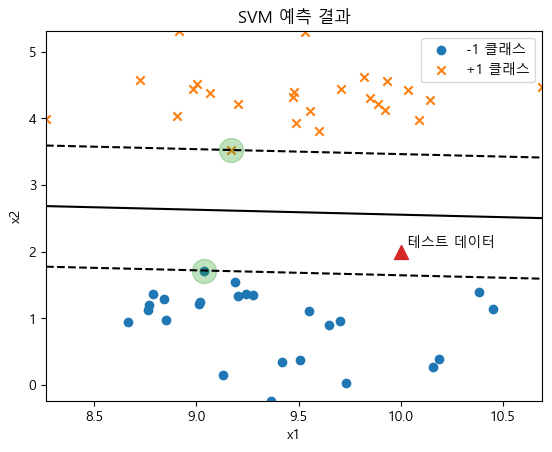

array([-0.61101582])

In [5]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
  x1 = val
  x2 = X2[i, j]
  p = model.decision_function([[x1, x2]])
  Z[i, j] = p[0]

levels = [-1, 0, 1]

linestyles = ['dashed', 'solid', 'dashed']

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")

plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]

plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()

plt.title("SVM 예측 결과")

plt.show()

x_new = [10, 2]
model.decision_function([x_new])
model.coef_.dot(x_new) + model.intercept_


# `make_blobs()`
## 분류용 가상 데이터 생성 함수
### 등방성 가우시간 정규 분포를 이용해 가상 데이터를 생성한다.

- 인수
  - `n_smaples` : 표본 데이터의 수, 디폴트 100<br><br>
  - `n_features` : 독립 변수의 수. 디폴트 2<br><br>
  - `centers` : 정수 또는 `[n_centers, n_features]` 크기의 배열.<br><br>
    - 생성할 클러스터의 수 혹은 중심. 디폴트 3<br><br>
  - `cluster_std` : 클러스터의 표준 편차. 디폴트 1.0<br><br>
  - `center_box` : 생성할 클러스터의 바운딩 박스 (`bounding box`). 디폴트 (-10.0, 10.0)<br><br>

- 반환값
  - `X` : 독립 변수. `[n_samples, n_features]` 크기의 배열<br><br>
  - `y` : 종속 변수. `[n_samples]` 크기의 배열<br><br>

# `SVC` 파라미터
- `C`
  - 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터 점이 잘못 분류된 정도를 나타낸다.<br><br>
  - `SVM` 모델이 오류를 어느 정도 허용할 것인지 파라미터 `C`를 통해 지정<br><br>
  - 값이 클수록 하드 마진(오류 허용 X), 작을 수록 소프트 마진(오류 허용 O)이다.<br><br>

- `gamma`
  - 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 역학<br><br>
  - `gamma` 값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다.<br><br>
    - 오버피팅 초래<br><br>
  - `gamma` 값을 낮추면 학습 데이터에 많이 의존해서 결정 경계를 직선에 가깝게 긋게된다.<br><br>
    - 언더피팅 초래<br><br>

  - `kernel`
    - 판별 경계를 찾기 위한 내적 함수.<br><br>
      - `linear`, `poly`, `rbf`, `sigmoid`, `precomputed`<br><br>
      - `default=rbf`<br><br>

`C`와 `gamma`를 지나치게 높게 잡는다면 오버피팅이 될 수 있다.<br><br>

## `SVC`의 속성 값
- `n_support_` : 각 클래스의 서포트 벡터의 개수<br><br>
- `support_` : 각 클래스의 서포트 벡터의 인덱스<br><br>
- `support_vectors_` : 각 클래스의 서포트의 `x`값<br><br>
- `coef_` : 기울기<br><br>
- `intercept_` : 절편<br><br>
- `dual_coef_` : 각 원소가 `ai * yi`로 이루어진 벡터<br><br>
  - 음의 계수와 양의 계수를 나타낸다.<br><br>

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()

X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3)

svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)

pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)

array([[19,  0],
       [ 0, 11]], dtype=int64)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


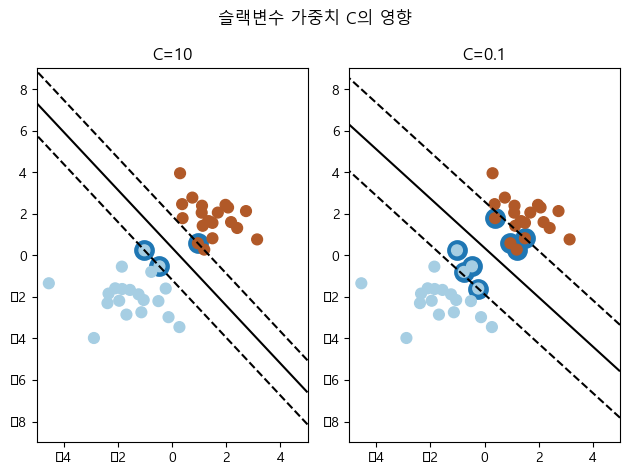

In [7]:
np.random.seed(0)

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1

for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
  clf = SVC(kernel='linear', C=penalty).fit(X, Y)
  xx = np.linspace(-5, 5)

  x_jin = -5
  x_jax = 5

  y_jin = -9
  y_jax = 9

  XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

  levels = [-1, 0, 1]

  linestyles = ['dashed', 'solid', 'dashed']

  Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
  Z = Z.reshape(XX.shape)
  
  plt.subplot(1, 2, plotnum)

  plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)

  plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

  plt.xlim(x_jin, x_jax)
  plt.ylim(y_jin, y_jax)

  plt.title(name)

  plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")

plt.tight_layout()

plt.show()

# 얼굴 인식 예제
- 학습을 위한 이미지 데이터는 어떠한 경우에도 1차원으로 변환해서 사용해야 한다.

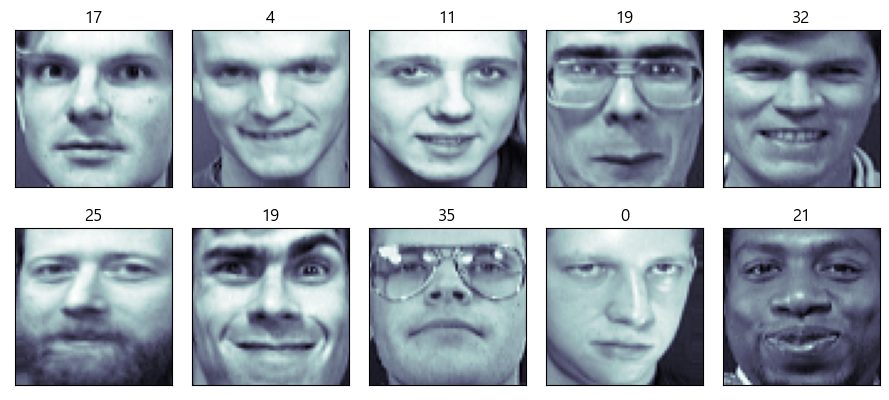

In [8]:
# 총 40명이 각각 10장의 조금씩 다른 표정이나 모습으로 찍은 이미지 데이터
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

N = 2
M = 5

np.random.seed(0)

fig = plt.figure(figsize=(9, 5))

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

klist = np.random.choice(range(len(faces.data)), N * M)

for i in range(N):
  for j in range(M):
    k = klist[i * M + j]

    ax = fig.add_subplot(N, M, i * M + j + 1)

    ax.imshow(faces.images[k], cmap=plt.cm.bone)

    ax.grid(False)

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    plt.title(faces.target[k])

plt.tight_layout()

plt.show()

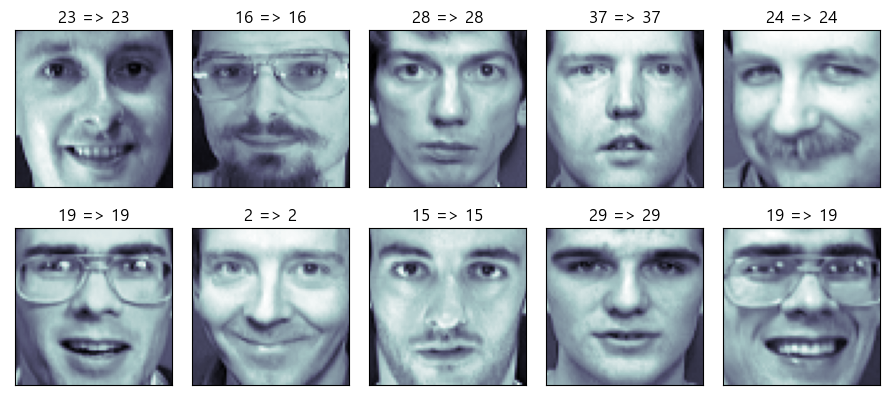

In [9]:
# 랜덤하게 뽑은 이미지
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  faces.data,
  faces.target,
  test_size=0.4,
  random_state=0
)

from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5

np.random.seed(4)

fig = plt.figure(figsize=(9, 5))

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N):
  for j in range(M):
    k = klist[i * M + j]

    ax = fig.add_subplot(N, M, i * M + j + 1)

    ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)

    ax.grid(False)

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

    plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))

plt.tight_layout()

plt.show()

In [10]:
# 랜덤하게 뽑은 이미지의 예측
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

# BMI 예제

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

bmi_df = pd.read_csv('./exsamples/bmi.csv')

In [14]:
bmi_df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [16]:
x = bmi_df.iloc[:,:-1]
y = bmi_df.iloc[:,2:]
y

,label
0,fat
1,fat
2,normal
3,thin
4,fat
...,...
19995,fat
19996,normal
19997,thin
19998,thin


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

yencoder = encoder.fit_transform(y[['label']])
y['label'] = yencoder
y

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label
0,0
1,0
2,1
3,2
4,0
...,...
19995,0
19996,1
19997,2
19998,2


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
svc = SVC(kernel='linear').fit(x_train,y_train)
y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2149
           1       0.98      0.98      0.98      1862
           2       0.99      0.99      0.99      1989

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

0.9865
